In [107]:
# ..................................................................................
# algoritmo PSO que minimiza la funcion unimodal f(x) = (x - a)^2 + (y + b)^2
# Utilizando Pyswarm
# ..................................................................................

from pyswarm import pso

In [108]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2  # componente cognitivo
c2 = 2  # componente social
w = 0  # factor de inercia
limite_inf = -100   # limite inferior de busqueda
limite_sup = 100    # limite superior de busqueda

In [109]:
a = float(input('Introducir a:').strip() or (a if 'a' in vars() else '0'))
b = float(input('Introducir b:').strip() or (b if 'b' in vars() else '0'))
print('a: ',a,'\nb: ',b )

a:  12.0 
b:  35.0


In [110]:
# función objetivo
# Se utilizará la misma, pero adaptada para que tome de input un array
def funcion_objetivo(x, a=0, b=0):
    return (x[0]-a)**2 + (x[1]+b)**2

lb = [limite_inf, limite_inf]  # limite inf
ub = [limite_sup, limite_sup]  # limite sup


# Llamada a la función pso
solucion_optima, valor_optimo = pso(funcion_objetivo, lb, ub, swarmsize=num_particulas, maxiter=cantidad_iteraciones,
                                    debug=True,omega=w, phip=c1, phig=c2, kwargs={'a':a, 'b':b})
# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
New best for swarm at iteration 1: [ 19.28323651 -36.52211331] 55.362362932105064
Best after iteration 1: [ 19.28323651 -36.52211331] 55.362362932105064
Best after iteration 2: [ 19.28323651 -36.52211331] 55.362362932105064
New best for swarm at iteration 3: [ 14.55034666 -32.89456601] 10.937120335483028
New best for swarm at iteration 3: [ 11.53401066 -32.4897359 ] 6.518571891681494
Best after iteration 3: [ 11.53401066 -32.4897359 ] 6.518571891681494
New best for swarm at iteration 4: [ 11.13348641 -32.80290936] 5.578053080456486
New best for swarm at iteration 4: [ 11.0667211  -33.01497796] 4.811322009704106
Best after iteration 4: [ 11.0667211  -33.01497796] 4.811322009704106
New best for swarm at iteration 5: [ 11.12987772 -33.17599102] 4.084121551403603
New best for swarm at iteration 5: [ 10.62057912 -33.71999962] 3.541202925349456
New best for swarm at iteration 5: [ 10.53081938 -35.20576521] 2.200831003642291
New best for swarm at iteration 5: [ 11.042530

In [111]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

X1 = np.linspace(limite_inf, limite_sup, 100)
X2 = np.linspace(limite_inf, limite_sup, 100)

X = np.meshgrid(X1, X2)

C = funcion_objetivo(X, a, b)

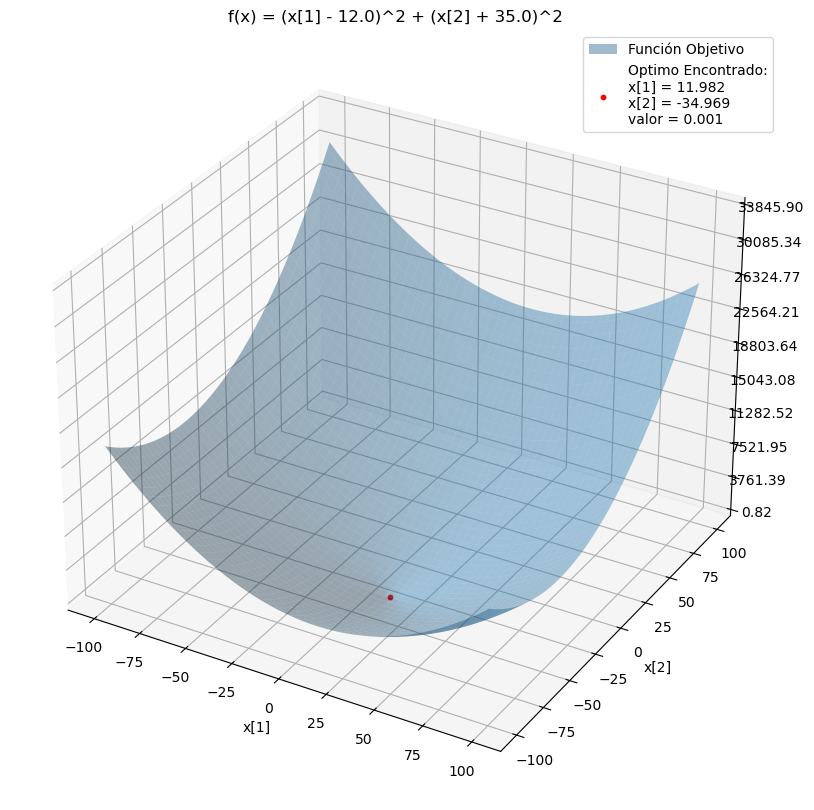

In [112]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X[0], X[1], C,
                       linewidth=0, antialiased=True, alpha=0.4,
                       label='Función Objetivo')

# Customize the z axis.
ax.set_zlim(C.min()-C.min()*.1, C.max()+C.max()*.1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
f_de_x = f'f(x) = (x[1] - {a})^2 + (x[2] + {b})^2'

fig.set_size_inches(10,10)
ax.set_title(f_de_x)
ax.set_xlabel("x[1]")
ax.set_ylabel("x[2]")


leyenda = f'Optimo Encontrado:\nx[1] = {solucion_optima[0]:.3f}\nx[2] = {solucion_optima[1]:.3f}\nvalor = {valor_optimo:.3f}'

ax.scatter(*solucion_optima, valor_optimo, c='red', marker='o', s=10, label=leyenda)

plt.legend()

# ax.view_init()

plt.show()


In [113]:
gbests =np.array([
    [-9.3584015,-27.67999586,  509.76377511253577],
    [-9.3584015,-27.67999586,  509.76377511253577],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759]]
)
gbests

array([[ -9.3584015 , -27.67999586, 509.76377511],
       [ -9.3584015 , -27.67999586, 509.76377511],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902]])

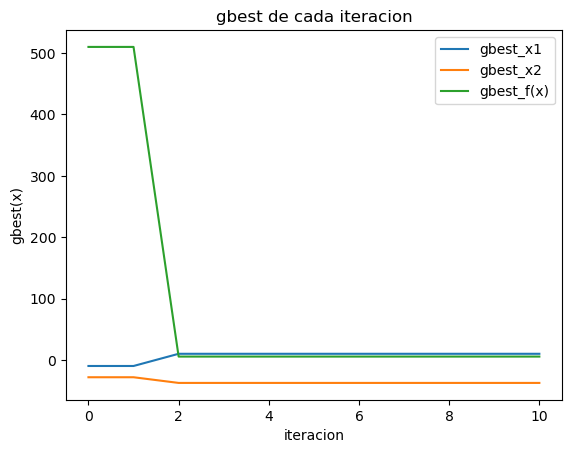

In [114]:
variable = ['x1','x2','f(x)']
for i in range(3):
    plt.plot(gbests[:,i], label=f'gbest_{variable[i]}')
# plt.plot(gbests[:,1], label='fitness_gbest(y)')
plt.title('gbest de cada iteracion')
plt.xlabel('iteracion')
plt.ylabel('gbest(x)')
plt.legend()
plt.show()